In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from astropy.io import fits as pf
from keckcode_test.keckcode.esiredux import esi2d, esi1d
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
file_loc = '../galaxy_spectra/ESI_data/*'

In [3]:
spec2d_file_list = []
var2d_file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'J0053' in p:
        if 'bgsub.fits' in p:
            spec2d_file_list.append(p)
        elif 'var.fits' in p:
            var2d_file_list.append(p)

In [4]:
spec2d_file_list

['../galaxy_spectra/ESI_data/J0053-2012_0028_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0053-2012_0030_bgsub.fits',
 '../galaxy_spectra/ESI_data/J0053-2012_0029_bgsub.fits']

In [5]:
var2d_file_list

['../galaxy_spectra/ESI_data/J0053-2012_0029_var.fits',
 '../galaxy_spectra/ESI_data/J0053-2012_0028_var.fits',
 '../galaxy_spectra/ESI_data/J0053-2012_0030_var.fits']

In [9]:
# create a list of spec2d object for particular order
spec1 = esi2d.Esi2d(spec2d_file_list[0], varfile=var2d_file_list[1])
spec2 = esi2d.Esi2d(spec2d_file_list[2], varfile=var2d_file_list[0])
spec3 = esi2d.Esi2d(spec2d_file_list[1], varfile=var2d_file_list[2])

Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x
Order  Shape    Dispaxis
----- --------- --------
  1   3461x165     x
  2   4093x145     x
  3   4096x146     x
  4   4096x141     x
  5   4096x130     x
  6   4096x127     x
  7   4096x124     x
  8   4096x121     x
  9   4096x117     x
 10   4096x111     x


Profile max value (before normalization) 39.437553
Profile max value (before normalization) 35.940909
Profile max value (before normalization) 44.018951


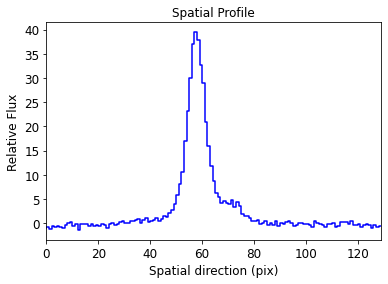

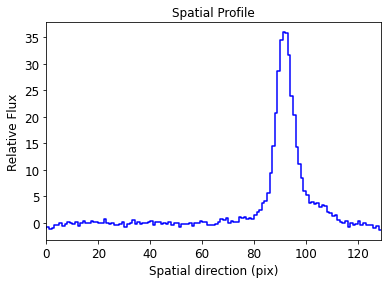

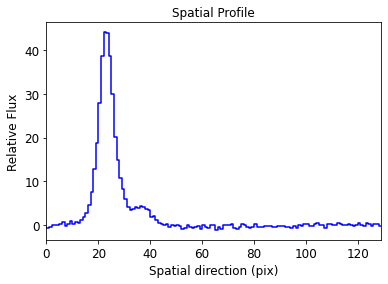

In [45]:
pixrange = [1600, 2400]
profile1 = spec1[4].spatial_profile(pixrange=pixrange)
profile2 = spec2[4].spatial_profile(pixrange=pixrange)
profile3 = spec3[4].spatial_profile(pixrange=pixrange)

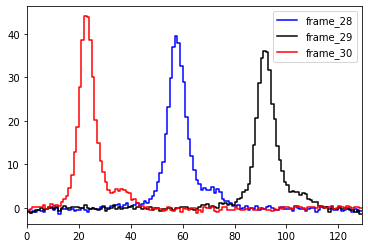

In [46]:
plt.plot(profile1.x, profile1.y, color='b', drawstyle='steps', label='frame_28')
plt.plot(profile2.x, profile2.y, color='k', drawstyle='steps', label='frame_29')
plt.plot(profile3.x, profile3.y, color='r', drawstyle='steps', label='frame_30')
plt.xlim(0, 129)
plt.legend()

In [78]:
ytrimlist = [[35, 96], [69, 130], [0, 61]]
spec2dlist = [spec1[4], spec2[4], spec3[4]]

In [79]:
sp_data = []
var_data = []

for i, p in enumerate(ytrimlist):
    ymin = p[0]
    ymax = p[1]
    sp_data.append(spec2dlist[i].data[ymin:ymax, :])
    var_data.append(spec2dlist[i].vardata[ymin:ymax, :])
    print(sp_data[i].shape, var_data[i].shape)

(61, 4096) (61, 4096)
(61, 4096) (61, 4096)
(61, 4096) (61, 4096)


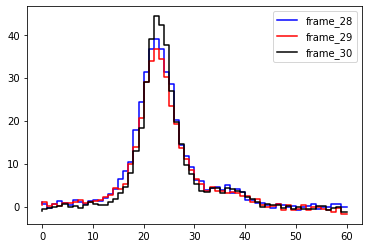

In [139]:
pixrange = [1900, 2400]
color = ['b', 'r', 'k']
label = ['frame_28', 'frame_29', 'frame_30']
for i, p in enumerate(sp_data):
    
    tmpdata = p[:, pixrange[0]:pixrange[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
plt.legend()

In [104]:
mask = np.isnan(var_data[0]) | (var_data[0] <=0)

In [125]:
wtsp = np.zeros(sp_data[0].shape)
wtsum = np.zeros(sp_data[0].shape)

for s, v in zip(sp_data, var_data):
    wt = np.zeros(wtsp.shape)
    mask = np.isnan(v) | (v<=0)
    wt[~mask] = 1.0 / v[~mask]
    #print(sum(sum(np.isnan(wt) | (wt<=0))))
    wtsp += wt * s
    #print(sum(sum(wtsp==0)))
    wtsum += wt
    #print(sum(sum(wtsum==0)))

In [126]:
wtsp[wtsum == 0] = 0
wtsum[wtsum == 0] = 1
outsp = wtsp / wtsum
outvar = 1.0 / wtsum

In [136]:
pf.PrimaryHDU(outsp).writeto('coadd2d_J0053.fits')

In [137]:
coadd_sp = spec2d.Spec2d('coadd2d_J0053.fits')


Loading file coadd2d_J0053.fits
-----------------------------------------------
Read in 2-dimensional spectrum from coadd2d_J0053.fits (HDU=0)
Final data dimensions (x y): 4096 x 61

Dispersion axis:              x
N_pixels along dispersion axis: 4096



Profile max value (before normalization) 39.544875


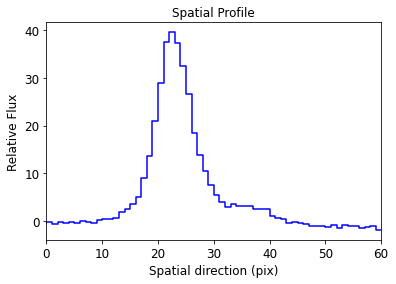

In [147]:
profile_cd = coadd_sp.spatial_profile(pixrange=[1900, 2400])

(0.0, 60.0)

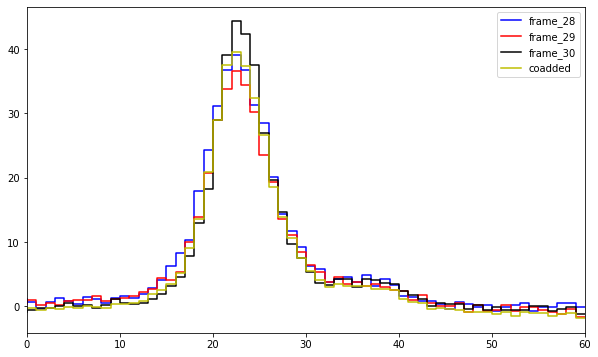

In [148]:
plt.figure(figsize=(10,6))
pixrange = [1900, 2400]
color = ['b', 'r', 'k']
label = ['frame_28', 'frame_29', 'frame_30']
for i, p in enumerate(sp_data):
    
    tmpdata = p[:, pixrange[0]:pixrange[1]]
    pflux = np.median(tmpdata, axis=1)
    x = np.arange(p.shape[0])
    plt.plot(x, pflux, color=color[i], drawstyle='steps', label=label[i])
plt.plot(profile_cd.x, profile_cd.y, color='y', drawstyle='steps', label='coadded')
plt.legend()
plt.xlim(0, 60)

In [156]:
from scipy.ndimage import map_coordinates

In [157]:
a = spec1[4].data[]

In [159]:
b = np.indices((80, 4096))

In [179]:
c = map_coordinates(a, b, order=5)

In [180]:
np.min(c -a[:80, :])

-4.547473508864641e-11